<a href="https://colab.research.google.com/github/databyhuseyn/MachineLearning/blob/main/Time_series_forecasting_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project 3: Time Series forecasting in TensorFlow(BitPredict)

In [135]:
import numpy as np

In [136]:
!wget https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-07-03 10:39:11--  https://raw.githubusercontent.com/Rstam59/TaskDataRepoForStudents/main/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.1s    

2024-07-03 10:39:12 (1.44 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.2’ saved [178509/178509]



In [137]:
# Import with pandas
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates=['Date'],
                 index_col=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [138]:
df.dtypes

Currency                object
Closing Price (USD)    float64
24h Open (USD)         float64
24h High (USD)         float64
24h Low (USD)          float64
dtype: object

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [140]:
len(df)

2787

In [141]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


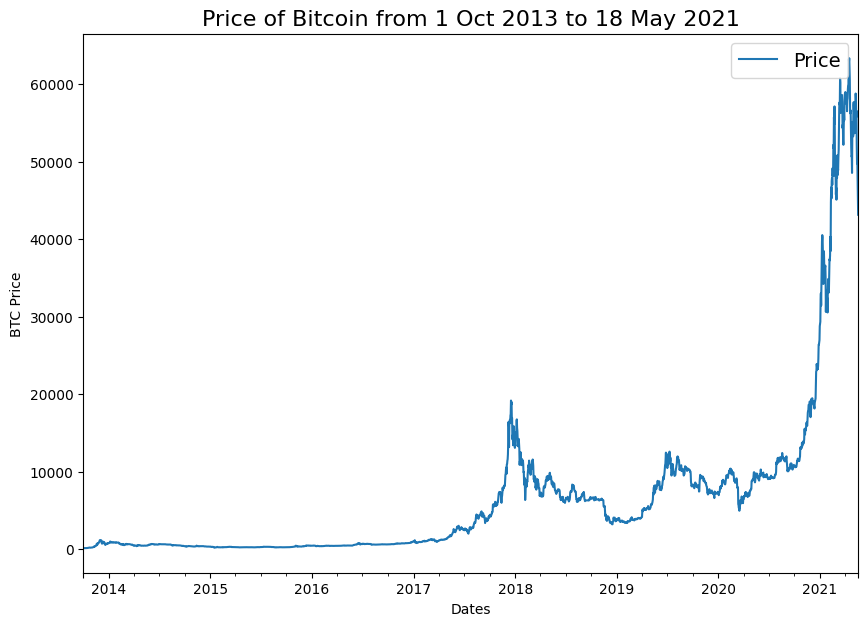

In [142]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.xlabel('Dates')
plt.legend(fontsize=14);

In [143]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))


# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

# Create train and test sets for time series (the wrong way)

In [144]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [145]:
# Wrong way to make train/test split for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,  # dates
                                                    prices,     # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

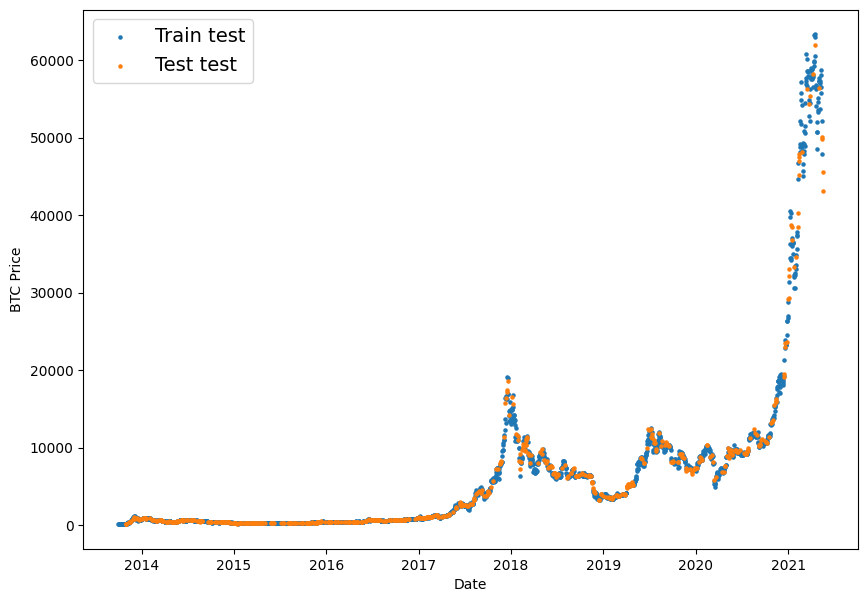

In [146]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train test')
plt.scatter(X_test, y_test, s=5, label='Test test')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)

# Correct way

In [147]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices))     # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create train data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

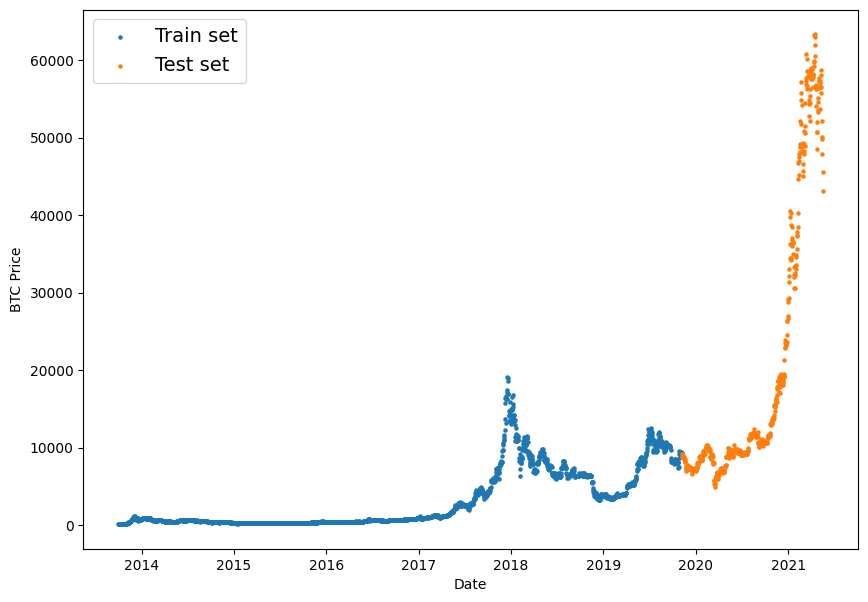

In [148]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train set')
plt.scatter(X_test, y_test, s=5, label='Test set')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)

In [149]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

# Naive Bayes Model

In [150]:
# Create a naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

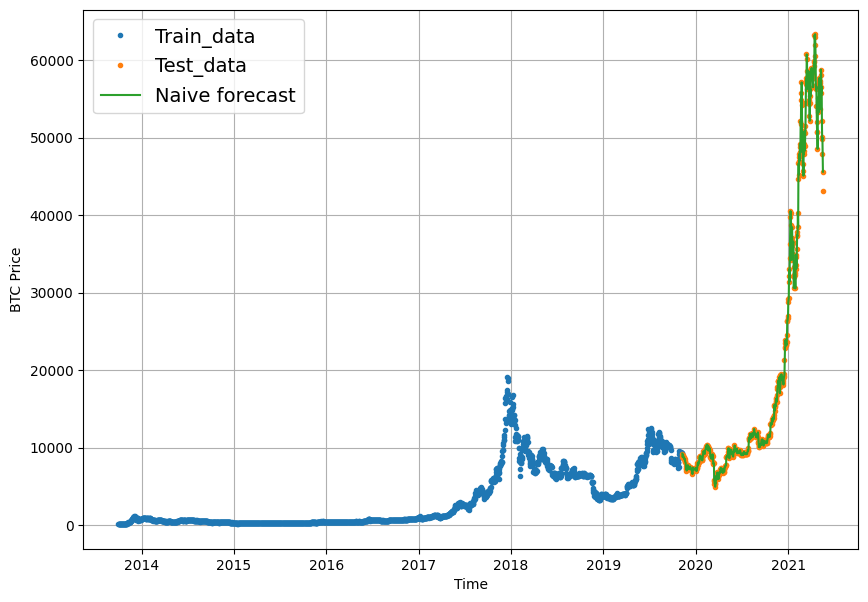

In [151]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label='Train_data')
plot_time_series(timesteps=X_test, values=y_test, label='Test_data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label='Naive forecast')


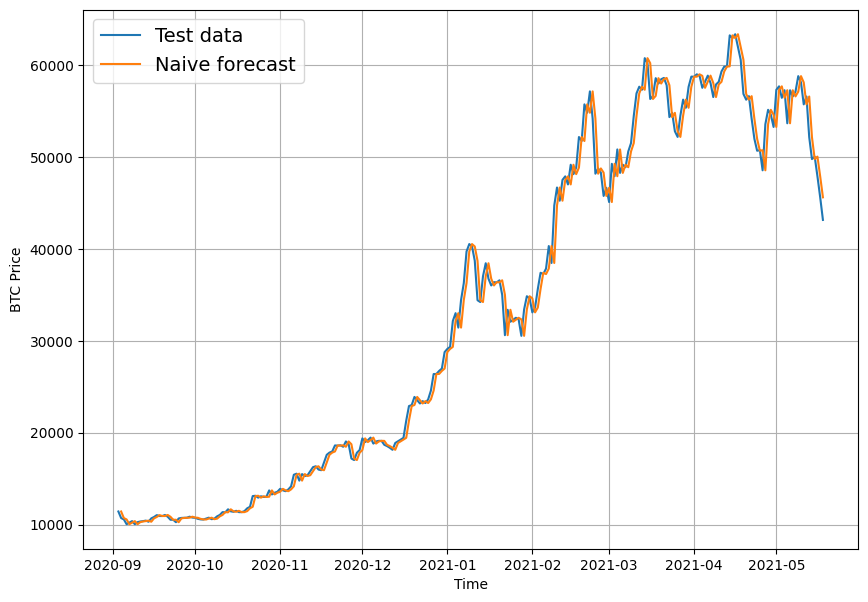

In [152]:
plt.figure(figsize=(10, 7))
offset = 300
plot_time_series(timesteps=X_test, values=y_test, start=offset, format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', start=offset, label='Naive forecast')

In [153]:
# import tensorflow
import tensorflow as tf

In [154]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data)
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))    # our seasonality is one day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [155]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)   # puts and emphasis on outlier (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {'mae': mae.numpy(),
          'mse': mse.numpy(),
          'rmse': rmse.numpy(),
          'mape': mape.numpy(),
          'mase': mase.numpy()}

In [156]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [157]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [158]:
HORIZON = 1
WINDOW_SIZE = 7

In [159]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [160]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f'Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}')

Window: [1 2 3 4 5 6 7] -> Label: 8


In [161]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns 1D array into a 2D array of sequential windows of window_size
  """

  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f'Window step:\n {window_step}')

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T    # create 2D array of windows of size window_size
  # print(f'Window indexes:\n {winow_indexes[:3], window_indexes[-3:], window_indexes.shape})

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [162]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [163]:
# View the first 3 windows/labels
for i in range(3):
  print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [164]:
# View the last 3 windows/laels
for i in range(3):
  print(f'Window {full_windows[i-3]} -> Label: {full_labels[i-3]}')

Window [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


In [165]:
# Make the train test split
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into tain and test splits.
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, train_labels, test_windows, test_labels

In [166]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [167]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [168]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),   # create filepath to save model
                                            verbose=0,    # only output a limited amount of text
                                            save_best_only=True)  # save only the best model to file

# Model 1: Dense Model (window = 7, horizon = 1)

In [169]:
import tensorflow as tf
from tensorflow.keras import layers

In [170]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

In [171]:
model_1.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='mean_absolute_error')

In [172]:
model_1_history = model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 38ms/step - loss: 1538.2528 - mean_absolute_error: 1538.2528 - val_loss: 1829.5729 - val_mean_absolute_error: 1829.5729
Epoch 2/100
18/18 [==============================] - 1s 36ms/step - loss: 356.3104 - mean_absolute_error: 356.3104 - val_loss: 1728.2561 - val_mean_absolute_error: 1728.2561
Epoch 3/100
18/18 [==============================] - 1s 34ms/step - loss: 214.4043 - mean_absolute_error: 214.4043 - val_loss: 1165.7942 - val_mean_absolute_error: 1165.7942
Epoch 4/100
18/18 [==============================] - 1s 52ms/step - loss: 193.8112 - mean_absolute_error: 193.8112 - val_loss: 1071.7144 - val_mean_absolute_error: 1071.7144
Epoch 5/100
18/18 [==============================] - 1s 50ms/step - loss: 188.4361 - mean_absolute_error: 188.4361 - val_loss: 1039.1965 - val_mean_absolute_error: 1039.1965
Epoch 6/100
18/18 [==============================] - 1s 48ms/step - loss: 182.3057 - mean_absolute_error: 182.3057 - val_loss: 1

In [173]:
model_1.name

'sequential_6'

In [174]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 601.9078 - mean_absolute_error: 601.9078


[601.9078369140625, 601.9078369140625]

In [175]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model('/content/model_experiments/sequential')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 565.6333 - mean_absolute_error: 565.6333


[565.63330078125, 565.63330078125]

In [176]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)     # return 1D array of predictions


In [177]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8848.501, 8792.168, 9023.411, 8795.997, 8752.48 , 8701.206,
        8695.032, 8528.692, 8445.505, 8530.079], dtype=float32)>)

In [178]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),   # reduce to right shape
                                y_pred=model_1_preds)
model_1_results

{'mae': 565.6335,
 'mse': 1159463.1,
 'rmse': 1076.7837,
 'mape': 2.5273826,
 'mase': 0.99366134}

# Model 2

In [179]:
# Model 2
WINDOW_SIZE = 30
HORIZON = 1

In [180]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [181]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [182]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

In [183]:
model_2.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='mean_absolute_error')

In [184]:
model_2_history = model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
18/18 [==============================] - 1s 53ms/step - loss: 1383.9099 - mean_absolute_error: 1383.9099 - val_loss: 4026.0774 - val_mean_absolute_error: 4026.0774
Epoch 2/100
18/18 [==============================] - 1s 40ms/step - loss: 452.4228 - mean_absolute_error: 452.4228 - val_loss: 2392.3420 - val_mean_absolute_error: 2392.3420
Epoch 3/100
18/18 [==============================] - 1s 43ms/step - loss: 323.5700 - mean_absolute_error: 323.5700 - val_loss: 1334.8684 - val_mean_absolute_error: 1334.8684
Epoch 4/100
18/18 [==============================] - 0s 6ms/step - loss: 259.6561 - mean_absolute_error: 259.6561 - val_loss: 1448.9226 - val_mean_absolute_error: 1448.9226
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 262.3589 - mean_absolute_error: 262.3589 - val_loss: 1499.9680 - val_mean_absolute_error: 1499.9680
Epoch 6/100
18/18 [==============================] - 1s 43ms/step - loss: 248.9001 - mean_absolute_error: 248.9001 - val_loss: 126

In [185]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 936.4528 - mean_absolute_error: 936.4528


[936.4528198242188, 936.4528198242188]

In [186]:
model_2 = tf.keras.models.load_model('/content/model_experiments/sequential_1')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 622.6317 - mean_absolute_error: 622.6317


[622.6316528320312, 622.6316528320312]

In [187]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

18/18 [==============================] - 0s 1ms/step


In [188]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 622.63153,
 'mse': 1304683.2,
 'rmse': 1142.2273,
 'mape': 2.7962086,
 'mase': 1.0883659}

# Model  3

In [189]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {
      'mae': mae.numpy(),
      'mse': mse.numpy(),
      'rmse': rmse.numpy(),
      'mape': mape.numpy(),
      'mase': mase.numpy(),
  }

In [190]:
# Model 3
WINDOW_SIZE = 30
HORIZON = 7

In [191]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [192]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [193]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

In [194]:
model_3.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='mean_absolute_error')

In [195]:
model_3_history = model_3.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 1s 36ms/step - loss: 1869.1185 - mean_absolute_error: 1869.1185 - val_loss: 3118.7031 - val_mean_absolute_error: 3118.7031
Epoch 2/100
18/18 [==============================] - 0s 29ms/step - loss: 544.5072 - mean_absolute_error: 544.5072 - val_loss: 2316.6042 - val_mean_absolute_error: 2316.6042
Epoch 3/100
18/18 [==============================] - 1s 39ms/step - loss: 384.1332 - mean_absolute_error: 384.1332 - val_loss: 1972.7556 - val_mean_absolute_error: 1972.7556
Epoch 4/100
18/18 [==============================] - 1s 39ms/step - loss: 354.5713 - mean_absolute_error: 354.5713 - val_loss: 1865.8433 - val_mean_absolute_error: 1865.8433
Epoch 5/100
18/18 [==============================] - 1s 42ms/step - loss: 329.4797 - mean_absolute_error: 329.4797 - val_loss: 1633.4706 - val_mean_absolute_error: 1633.4706
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 314.8094 - mean_absolute_error: 314.8094 - val_loss: 17

In [196]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1238.0455 - mean_absolute_error: 1238.0455


[1238.0455322265625, 1238.0455322265625]

In [197]:
model_3 = tf.keras.models.load_model('/content/model_experiments/sequential_2')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1218.7041 - mean_absolute_error: 1218.7041


[1218.7041015625, 1218.7041015625]

In [198]:
model_3_preds = make_preds(model_3,
                           input_data = test_windows)

18/18 [==============================] - 0s 1ms/step


In [199]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1218.7041,
 'mse': 5238897.5,
 'rmse': 1408.8033,
 'mape': 5.5761843,
 'mase': 2.1686156}

<Axes: >

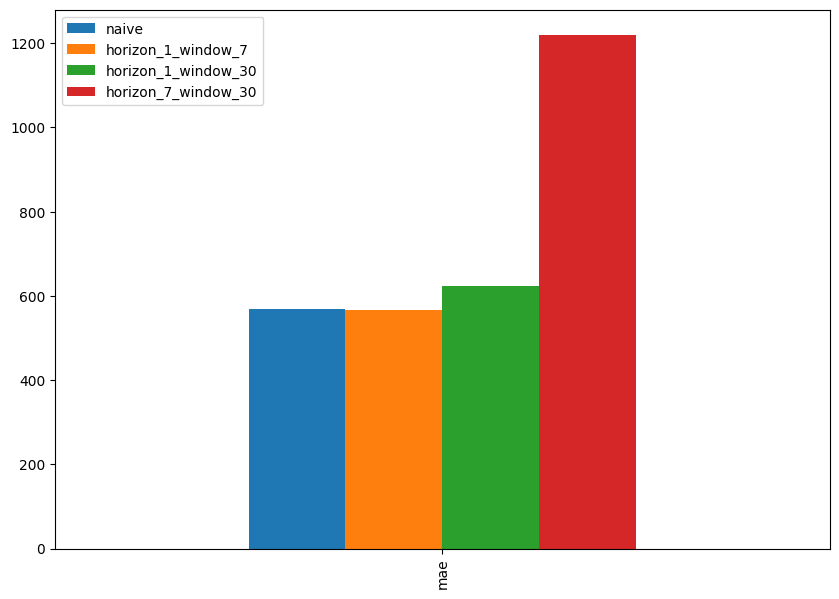

In [202]:
pd.DataFrame({'naive': naive_results['mae'],
              'horizon_1_window_7': model_1_results['mae'],
              'horizon_1_window_30': model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae']
              }, index=['mae']).plot(figsize=(10, 7), kind='bar')

# Model 4

In [212]:
# Model 4
WINDOW_SIZE = 7
HORIZON = 1

In [225]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [226]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [219]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 576.6687 - mean_absolute_error: 576.6687


[576.668701171875, 576.668701171875]

Since
expand dims won't be initialized if we do not
initialize it outside model, it's better if we write it in our model using lambda

In [220]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
print(f'Original shape: {x.shape}')
print(f'Expanded shape: {expand_dims_layer(x).shape}')
print(f'Original values with expanded shape:\n {expand_dims_layer(x)}')

Original shape: (7, 1)
Expanded shape: (7, 1, 1)
Original values with expanded shape:
 [[[123.65499]]

 [[125.455  ]]

 [[108.58483]]

 [[118.67466]]

 [[121.33866]]

 [[120.65533]]

 [[121.795  ]]]


In [227]:
# Let's create our model again

tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
    # Create lambda layer to reshape inputs, without this layer, the model will error
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),   # resize the inputs to adjust for windows size / Conv 1D 3D
    layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_conv1D')

# Compile model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

model_4_history = model_4.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [228]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_5 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_23 (Dense)            (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
model_4 = tf.keras.models.load_model('/content/model_experiments/sequential_3')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 564.4478 - mean_absolute_error: 564.4478


[564.44775390625, 564.44775390625]

In [230]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8856.483, 8796.907, 9039.607, 8794.8  , 8752.317, 8719.206,
       8691.122, 8535.639, 8457.994, 8534.313], dtype=float32)>

# Model 5 - RNN

In [231]:
# Model 4
WINDOW_SIZE = 30
HORIZON = 7

In [232]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [233]:
train_windows, train_labels, test_windows, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [234]:
# Expand dimensions of your data
train_windows = np.expand_dims(train_windows, axis=-1)
test_windows = np.expand_dims(test_windows, axis=-1)

In [235]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(HORIZON)
])

In [236]:
model_5.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics='mean_absolute_error')

In [237]:
model_5_history = model_5.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

Epoch 1/100
18/18 [==============================] - 5s 181ms/step - loss: 3069.4998 - mean_absolute_error: 3069.4998 - val_loss: 17563.4492 - val_mean_absolute_error: 17563.4492
Epoch 2/100
18/18 [==============================] - 4s 202ms/step - loss: 2018.9784 - mean_absolute_error: 2018.9784 - val_loss: 7660.6816 - val_mean_absolute_error: 7660.6816
Epoch 3/100
18/18 [==============================] - 1s 71ms/step - loss: 1736.5957 - mean_absolute_error: 1736.5957 - val_loss: 14049.9365 - val_mean_absolute_error: 14049.9365
Epoch 4/100
18/18 [==============================] - 1s 72ms/step - loss: 2477.0515 - mean_absolute_error: 2477.0515 - val_loss: 11919.3701 - val_mean_absolute_error: 11919.3701
Epoch 5/100
18/18 [==============================] - 2s 92ms/step - loss: 1863.5568 - mean_absolute_error: 1863.5568 - val_loss: 8114.4272 - val_mean_absolute_error: 8114.4272
Epoch 6/100
18/18 [==============================] - 4s 222ms/step - loss: 1085.7819 - mean_absolute_error: 1085

In [238]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 13ms/step - loss: 1640.2780 - mean_absolute_error: 1640.2780


[1640.2779541015625, 1640.2779541015625]

In [239]:
model_5 = tf.keras.models.load_model('/content/model_experiments/sequential_4')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1217.7772 - mean_absolute_error: 1217.7772


[1217.7772216796875, 1217.7772216796875]

# Comparison

In [244]:
model_4_history

In [245]:
mae_1 = model_1_history.history['mean_absolute_error'][-1]
mae_2 = model_2_history.history['mean_absolute_error'][-1]
mae_3 = model_3_history.history['mean_absolute_error'][-1]
mae_4 = model_4_history.history['mean_absolute_error'][-1]
mae_5 = model_5_history.history['mean_absolute_error'][-1]

In [246]:
val_mae_1 = model_1_history.history['val_mean_absolute_error'][-1]
val_mae_2 = model_2_history.history['val_mean_absolute_error'][-1]
val_mae_3 = model_3_history.history['val_mean_absolute_error'][-1]
val_mae_4 = model_4_history.history['val_mean_absolute_error'][-1]
val_mae_5 = model_5_history.history['val_mean_absolute_error'][-1]

In [249]:
names = ['mae_1', 'mae_2', 'mae_3', 'mae_4', 'mae_5']
val_names = ['val_mae_1', 'val_mae_2', 'val_mae_3', 'val_mae_4', 'val_mae_5']


<ipython-input-250-4a9f05c7377b>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


NameError: name 'mae_4' is not defined

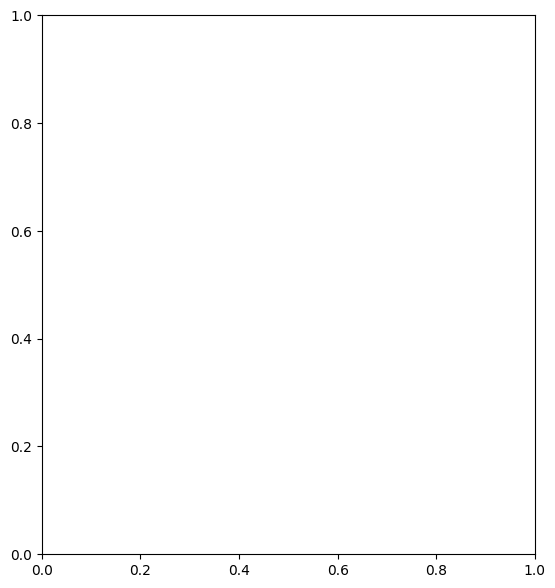

In [250]:
fig, ax = plt.subplots(figsize=(14, 7))
plt.subplot(121)
plt.bar(names, [mae_1, mae_2, mae_3, mae_4, mae_5])
plt.title("MAE of train")
plt.subplot(122)
plt.bar(val_names, [val_mae_1, val_mae_2, val_mae_3, val_mae_4, val_mae_5])
plt.title("MAE of validation")

# Multivariate time series

In [252]:
# Block reward values
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

# Block reward dates (datetime form of the above data stamps)
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-11')

In [253]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [256]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


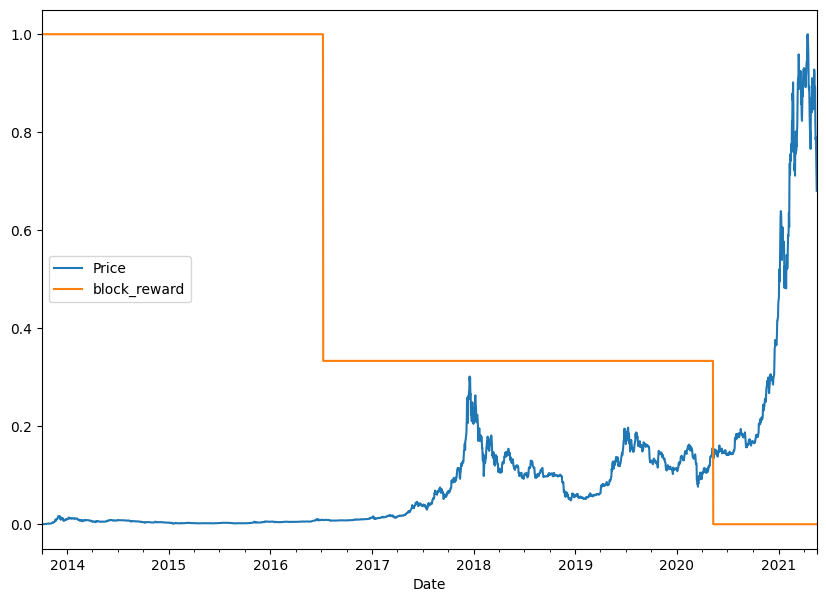

In [257]:
# Plot the block reward/prize over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));